# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [6]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

load_dotenv()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [7]:
# Read your api key environment variable
# YOUR CODE HERE!
from newsapi import NewsApiClient
api_key = os.getenv("news_api")

In [8]:
# Create a newsapi client
# YOUR CODE HERE!
newsapi = NewsApiClient(api_key=api_key)

In [9]:
# Fetch the Bitcoin news articles
btc_articles = newsapi.get_everything(q="Bitcoin", language="en", sort_by="relevancy")
btc_articles

{'status': 'ok',
 'totalResults': 6492,
 'articles': [{'source': {'id': 'wired', 'name': 'Wired'},
   'author': 'Paul Ford',
   'title': 'A Field Guide for Nature-Resistant Nerds',
   'description': 'Yes, yes, the dirt is horrifying. But it’s also how we make bitcoin apps.',
   'url': 'https://www.wired.com/story/a-field-guide-for-nature-resistant-nerds-microchips-climate-change/',
   'urlToImage': 'https://media.wired.com/photos/61086c497b8c62be3062fe82/191:100/w_1280,c_limit/WI090121_MG_Ford_01.jpg',
   'publishedAt': '2021-08-06T11:00:00Z',
   'content': 'When my wife started a little garden in our urban backyard, all I could think about were the worms. Also the bugs, and the dirt, which is of course filled with worms and bugs and composted corn cobs.… [+3499 chars]'},
  {'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
   'author': 'Sarah Perez',
   'title': 'PayPal expands the ability to buy, hold and sell cryptocurrency to the U.K.',
   'description': 'PayPal will now allow 

In [10]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
eth_articles = newsapi.get_everything(q="Ethereum", language="en", sort_by="relevancy")
eth_articles

{'status': 'ok',
 'totalResults': 2972,
 'articles': [{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
   'author': 'Lucas Matney',
   'title': 'Offchain Labs raises $120 million to hide Ethereum’s shortcomings with its Arbitrum product',
   'description': 'As the broader crypto world enjoys a late summer surge in enthusiasm, more and more blockchain developers who have taken the plunge are bumping into the blaring scaling issues faced by decentralized apps on the Ethereum blockchain. The popular network has see…',
   'url': 'http://techcrunch.com/2021/08/31/offchain-labs-raises-120-million-to-hide-ethereums-shortcomings-with-arbitrum-scaling-product/',
   'urlToImage': 'https://techcrunch.com/wp-content/uploads/2021/08/Image-from-iOS-5.jpg?w=533',
   'publishedAt': '2021-08-31T12:30:39Z',
   'content': 'As the broader crypto world enjoys a late summer surge in enthusiasm, more and more blockchain developers who have taken the plunge are bumping into the blaring scaling issues fa

In [12]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []

for article in btc_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_df = pd.DataFrame(btc_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_df = btc_df[cols]

btc_df.head()


,date,text,compound,positive,negative,neutral
0,2021-08-06,When my wife started a little garden in our ur...,-0.3400,0.000,0.061,0.939
1,2021-08-23,PayPal will now allow users outside the U.S. t...,0.4215,0.098,0.000,0.902
2,2021-08-10,Photo by Joe Raedle/Getty Images\r\n\n \n\n Tw...,0.4019,0.080,0.000,0.920
3,2021-08-19,Retailers are increasingly accepting cryptocur...,0.6187,0.153,0.000,0.847
4,2021-08-23,"PayPal is bringing the ability to buy, hold an...",0.6908,0.161,0.000,0.839


In [13]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments = []

for article in eth_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]

eth_df.head()


,date,text,compound,positive,negative,neutral
0,2021-08-31,As the broader crypto world enjoys a late summ...,0.7351,0.167,0.0,0.833
1,2021-08-05,Cent was founded in 2017 as an ad-free creator...,0.6956,0.190,0.0,0.810
2,2021-08-23,PayPal will now allow users outside the U.S. t...,0.4215,0.098,0.0,0.902
3,2021-08-23,"PayPal is bringing the ability to buy, hold an...",0.6908,0.161,0.0,0.839
4,2021-08-10,"After the bell today, Coinbase reported anothe...",0.5719,0.139,0.0,0.861


In [14]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
btc_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.00000,20.000000,20.000000
mean,0.182980,0.07525,0.033500,0.891250
std,0.448631,0.06384,0.068998,0.067822
min,-0.886000,0.00000,0.000000,0.729000
25%,0.000000,0.00000,0.000000,0.846000
50%,0.314100,0.08150,0.000000,0.904500
75%,0.525925,0.10825,0.043000,0.917750
max,0.718400,0.20000,0.271000,1.000000


In [15]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
eth_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.00000,20.000000,20.000000
mean,0.175475,0.06820,0.026400,0.905350
std,0.414882,0.06409,0.072668,0.078087
min,-0.893400,0.00000,0.000000,0.688000
25%,0.000000,0.00000,0.000000,0.859500
50%,0.226300,0.06200,0.000000,0.920000
75%,0.445000,0.10750,0.000000,0.953250
max,0.735100,0.19000,0.312000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: BTC

Q: Which coin had the highest compound score?

A: ETH

Q. Which coin had the highest positive score?

A: BTC

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [17]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [18]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
nltk.download('stopwords')

sw = set(stopwords.words('english'))



# Expand the default stopwords list if necessary
sw_addon = {'the'}

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    sw_addon = {'the'}
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addon)]
    
    # Remove the stop words
    
    
    return tokens

In [21]:
# Create a new tokens column for Bitcoin
btc_df['tokens'] = btc_df['text'].apply(tokenizer)

btc_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-08-06,When my wife started a little garden in our ur...,-0.3400,0.000,0.061,0.939,"[wife, started, little, garden, urban, backyar..."
1,2021-08-23,PayPal will now allow users outside the U.S. t...,0.4215,0.098,0.000,0.902,"[paypal, allow, user, outside, us, buy, hold, ..."
2,2021-08-10,Photo by Joe Raedle/Getty Images\r\n\n \n\n Tw...,0.4019,0.080,0.000,0.920,"[photo, joe, raedlegetty, images, twitter, squ..."
3,2021-08-19,Retailers are increasingly accepting cryptocur...,0.6187,0.153,0.000,0.847,"[retailers, increasingly, accepting, cryptocur..."
4,2021-08-23,"PayPal is bringing the ability to buy, hold an...",0.6908,0.161,0.000,0.839,"[paypal, bringing, ability, buy, hold, sell, c..."


In [22]:
# Create a new tokens column for Ethereum
eth_df['tokens'] = eth_df['text'].apply(tokenizer)

eth_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-08-31,As the broader crypto world enjoys a late summ...,0.7351,0.167,0.0,0.833,"[broader, crypto, world, enjoys, late, summer,..."
1,2021-08-05,Cent was founded in 2017 as an ad-free creator...,0.6956,0.190,0.0,0.810,"[cent, wa, founded, adfree, creator, network, ..."
2,2021-08-23,PayPal will now allow users outside the U.S. t...,0.4215,0.098,0.0,0.902,"[paypal, allow, user, outside, us, buy, hold, ..."
3,2021-08-23,"PayPal is bringing the ability to buy, hold an...",0.6908,0.161,0.0,0.839,"[paypal, bringing, ability, buy, hold, sell, c..."
4,2021-08-10,"After the bell today, Coinbase reported anothe...",0.5719,0.139,0.0,0.861,"[bell, today, coinbase, reported, another, per..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [25]:
from collections import Counter
from nltk import ngrams

In [26]:
# Generate the Bitcoin N-grams where N=2
big_string_1 = btc_df['text'].str.cat()
processed_1 = tokenizer(big_string_1)
bigrams_1 = Counter(ngrams(processed_1, n=2))

In [27]:
# Generate the Ethereum N-grams where N=2
big_string_2 = eth_df['text'].str.cat()
processed_2 = tokenizer(big_string_2)
bigrams_2 = Counter(ngrams(processed_2, n=2))

In [28]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [29]:
# Use token_count to get the top 10 words for Bitcoin
top_10_btc = token_count(bigrams_1, 10)

top_10_btc

[(('buy', 'hold'), 3),
 (('hold', 'sell'), 3),
 (('charspaypal', 'allow'), 2),
 (('allow', 'user'), 2),
 (('allow', 'customer'), 2),
 (('sell', 'cryptocurrencies'), 2),
 (('charsby', 'joe'), 2),
 (('joe', 'tidycyber'), 2),
 (('tidycyber', 'reporter'), 2),
 (('roughly', 'million'), 2)]

In [30]:
# Use token_count to get the top 10 words for Ethereum
top_10_eth = token_count(bigrams_2, 10)

top_10_eth

[(('aug', 'reuters'), 3),
 (('cryptocurrency', 'heist'), 3),
 (('buy', 'hold'), 2),
 (('hold', 'sell'), 2),
 (('first', 'time'), 2),
 (('reached', 'billion'), 2),
 (('pc', 'motherboard'), 2),
 (('ha', 'come'), 2),
 (('monday', 'poly'), 2),
 (('poly', 'network'), 2)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

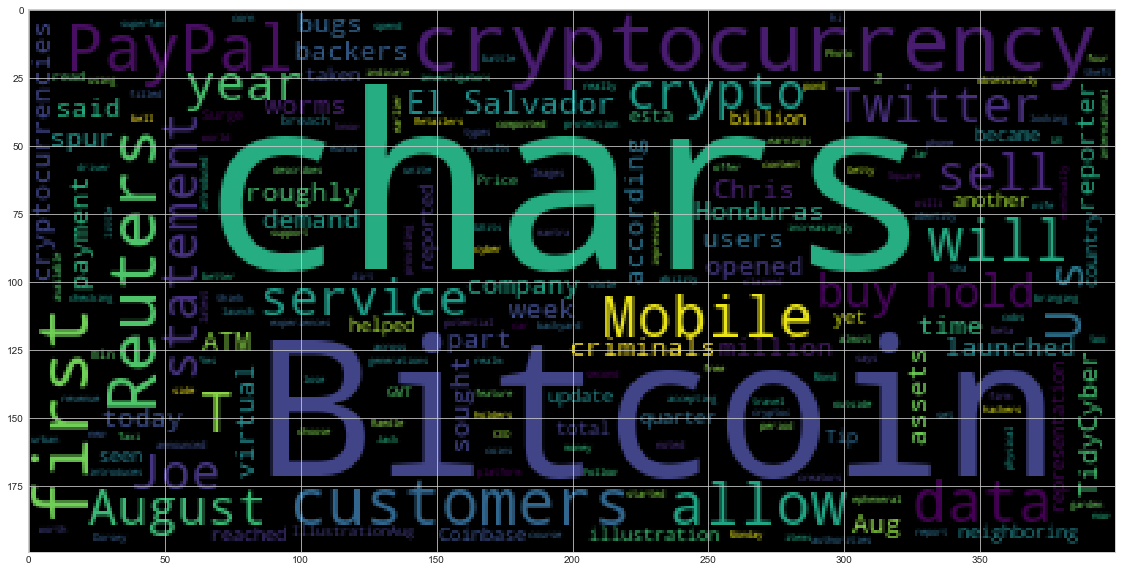

In [33]:
# Generate the Bitcoin word cloud
wc_btc = WordCloud().generate(big_string_1)
plt.imshow(wc_btc)

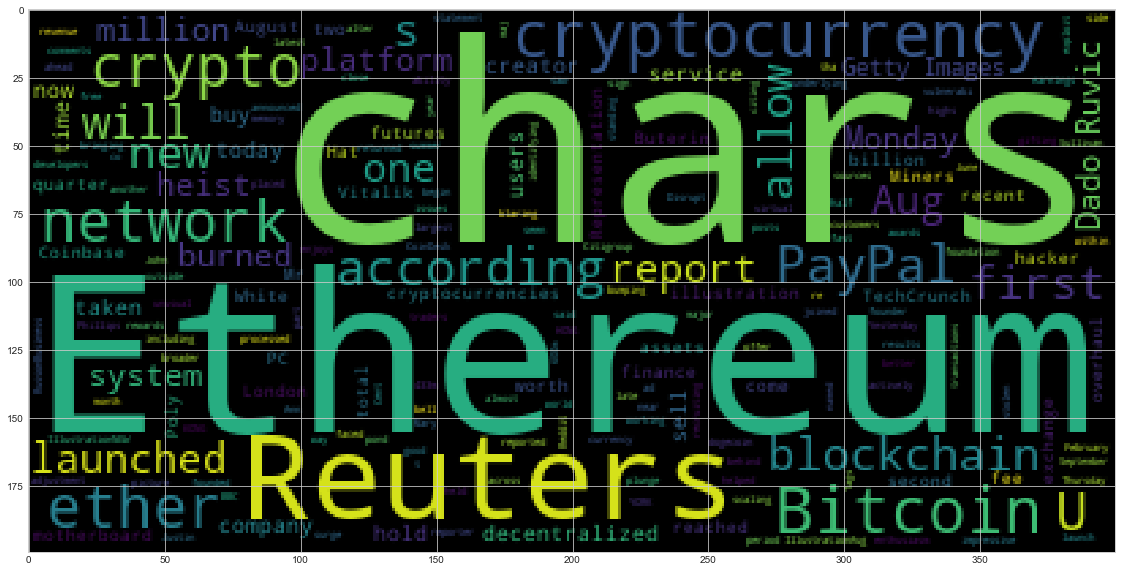

In [34]:
# Generate the Ethereum word cloud
wc_eth = WordCloud().generate(big_string_2)
plt.imshow(wc_eth)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [41]:
import spacy
from spacy import displacy

In [40]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm


[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [42]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [43]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!
bitcoin_text = (big_string_1)

In [44]:
# Run the NER processor on all of the text
doc_1 = nlp(bitcoin_text)

# Add a title to the document
doc_1.user_data["NER Visualization - Bitcoin"] = "NER Visualization - Bitcoin"

In [45]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc_1, style='ent')

In [46]:
# List all Entities
# YOUR CODE HERE!
for ent in doc_1.ents:
    print(ent.text)

U.S.
first
today
U.K.
Joe Raedle/
Twitter
Square
Jack Dorsey
Monday
a year
US
Joe TidyCyber
Chris
almost 2,500
2,100
Chris
Joe
UK
first
four
chars]T-Mobile
two years
roughly 49 million
27
Reuters
first
ATM
Honduras
this week
El Salvador
first
27
Reuters
first
ATM
Honduras
this week
El Salvador
first
today
Coinbase
its second quarter
the quarter
Coinbase
$2.23 billion
Tip Jar
Twitter
earlier this year
first
$311 billion
Q2 2021
Insider Intellige
August 6, 2021
REUTERS
Dado Ruvic/IllustrationAug
20
Reuters
5.01 %
49,106.4
22:04 GMT
Friday
+416 chars]T-Mobile
Motherboard
20, 2021
PennyStocksBitcoin Price Surge Helped Boost
Bitcoin, Dogecoin
Ethereum
T-Mobile
Roughly 47.8 million
June 7, 2021
REUTERS
Edgar Su/IllustrationAug
Reuters
7.07%
47,587.38
2200
24, 2021
Entrepreneur
El Salvador’s
Bitcoin 


---

### Ethereum NER

In [47]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!
ethereum_text = (big_string_2)

In [48]:
# Run the NER processor on all of the text
doc_2 = nlp(ethereum_text)

# Add a title to the document
doc_2.user_data["NER Visualization - Ethereum"] = "NER Visualization - Ethereum"

In [49]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc_2, style='ent')

In [50]:
# List all Entities
# YOUR CODE HERE!
for ent in doc_2.ents:
    print(ent.text)

late summer
2017
Reddit
Ethereum
U.S.
first
today
U.K.
a year
US
today
Coinbase
its second quarter
the quarter
Coinbase
$2.23 billion
Ethereum
February 3, 2018
REUTERS
Dado Ruvic
Aug 5
Reuters
Monday
Poly Network
White
+1513 chars]HONG KONG
Aug 5
Reuters
two-month
Thursday
Ethereum
June 29, 2021
REUTERS
Dado Ruvic/IllustrationAug 3
Reuters
Ethereum
TechCrunch Disrupt London 2015
John Phillips
Vitalik Buterin
Sullivan/Getty Images
Citigroup
CoinDesk
two
one
BBC News
almost half
$600m
433
Yesterday
25
Reuters
September
first
$311 billion
Q2 2021
Insider Intellige
above $100
first
Monday
more than 200%
August
chars]More than $144 million
August 5
Sunday
over 45,799
second
Dado Ruvic
Reuters
More than $144 million
Ethereum
Taylor
VanEck
Ethereum
the US Securities and Exchange Commission
Wednesday
Monday
Poly Network
White Hat
$610 million


---